In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import figure_names
# Atomic save saves the checkpoint in a weird module setup - this is a hack to get around that
import sys
sys.path.append("/root/eigenestimation/eigenestimation")

# Append module directory for imports
import numpy as np
from eigenestimation.toy_models.tms import AutoencoderSymmetric,  AutoencoderParallel  # Import your model
from eigenestimation.evaluation.networks import DrawNeuralNetwork
from importlib import reload
import torch

# Reload the figure_names module
reload(figure_names)


<module 'figure_names' from '/root/eigenestimation/notebooks/figure_names.py'>

In [2]:
def PlotLossLandscape(x,y,z, arrows, ax):
    # Apply a transformation to change the principal axes
    R = np.array([[.5, -0.8, 0], [0.5, 0.8, 0], [0, 0, 1]])  # Rotation matrix
    coords = np.vstack([x.flatten(), y.flatten(), z.flatten()])
    transformed_coords = R @ coords
    x_t = transformed_coords[0].reshape(x.shape)
    y_t = transformed_coords[1].reshape(y.shape)
    z_t = transformed_coords[2].reshape(z.shape)


    # Plot the surface mesh with transformed coordinates
    ax.plot_surface(x_t, y_t, z_t, cmap='viridis_r', edgecolor='none', alpha=.9)

    # Don't show grid lines on the surface plot, but show them on the axes


    # Labels
    # Set z label as Z
    ax.set_xlabel('$w_1$', labelpad=-15)
    ax.set_ylabel('$w_2$', labelpad=-15)
    # Keep z label horizontal
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)

    # Remove tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_box_aspect(aspect=None, zoom=0.8)
    ax.plot([0], [0], 'k.', zs=[0], zorder=11, markersize=10)
    
    for arrow in arrows:
        ax.plot(arrow[0], arrow[1], '--', zs=[0,0], zorder=10)
    


/tmp/ipykernel_14955/1521832022.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


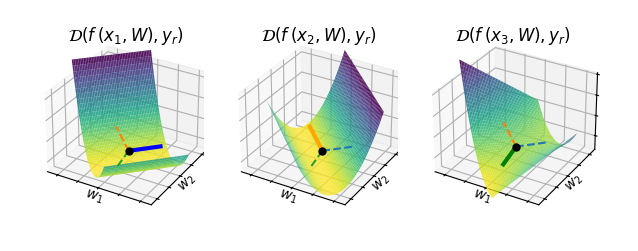

In [3]:
    # Create the 3D figure
fig = plt.figure(figsize=(10, 3))

# Define the mesh grid
x = np.linspace(-5,5, 50)
y = np.linspace(-5, 5, 50)
x, y = np.meshgrid(x, y)

arrows_v1 = ([0,2], [0,2])
arrows_v2 = ([0,-3], [0,3])
arrows_v3 = ([0,.5], [0,-3])
arrows = (arrows_v1, arrows_v2, arrows_v3)
#plt.savefig(filename, format='svg', bbox_inches='tight', transparent=True)

ax1 = fig.add_subplot(131, projection='3d')
PlotLossLandscape(x,y,(y-1)*(y+3), arrows, ax=ax1)
ax1.plot(arrows_v1[0], arrows_v1[1], 'b-', zs=[0,0], zorder=10, linewidth=3)


ax2 = fig.add_subplot(132, projection='3d')
PlotLossLandscape(x,y,(x-1)*(x+3), arrows, ax=ax2)
ax2.plot(arrows_v2[0], arrows_v2[1], '-', zs=[0,0], zorder=10, linewidth=3, color='orange')

ax3 = fig.add_subplot(133, projection='3d')
PlotLossLandscape(x,y,-(x-y-2)*(.1*y), arrows, ax=ax3)
ax3.plot(arrows_v3[0], arrows_v3[1], '-', zs=[0,0], zorder=10, linewidth=3, color='green')

# On the axes make arrows pointing in the direction of the gradient
# Plot this as an arrow instead of a line


# Move plots closer together
fig.subplots_adjust(wspace=-.5)

ax1.set_title('$\mathcal{D}(f\: (x_1, W), y_r)$',y=.9)
ax2.set_title('$\mathcal{D}(f\: (x_2, W), y_r)$', y=.9)
ax3.set_title('$\mathcal{D}(f\: (x_3, W), y_r)$', y=.9)


plt.tight_layout()
# Save the figure
plt.savefig(figure_names.jacobian_diagram, bbox_inches='tight', transparent=True)
plt.savefig(figure_names.jacobian_diagram.replace('.pdf', '.svg'), bbox_inches='tight', transparent=True)

# Display toy models

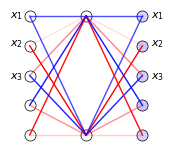

In [3]:
# Load TMS model
tms_eigenmodel_path = '/root/eigenestimation/outputs/eigenmodels/tms.pt'

eigenmodel = torch.load(tms_eigenmodel_path)['model']

model_params = dict(eigenmodel.named_parameters())
weights = {k:v for k,v in model_params.items() if 'b' not in k}
weights = {str(i):v.transpose(0,1) for i,v in enumerate(weights.values())}

biases = {k:v for k,v in model_params.items() if 'b' in k}
biases = {str(i+1):v for i,v in enumerate(biases.values())}

f, ax = plt.subplots(figsize=(1.6, 1.7))
a = DrawNeuralNetwork(weights, biases, ax=ax)

ax.text(.65,.89, s='$x_1$', fontsize=8)
ax.text(.65,.7, s='$x_2$', fontsize=8)
ax.text(.65,.48, s='$x_3$', fontsize=8)
ax.text(3.15 ,.89, s='$x_1$', fontsize=8)
ax.text(3.15,.7, s='$x_2$', fontsize=8)
ax.text(3.15,.48, s='$x_3$', fontsize=8)

f.savefig(figure_names.toy_models_setup % 'a', bbox_inches='tight', transparent=True)
f.savefig(figure_names.toy_models_setup.replace('.pdf', '.svg') % 'a', bbox_inches='tight', transparent=True)

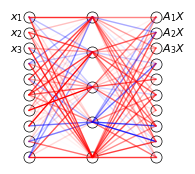

In [7]:
# Load TMS model
circuit_superposition_path = '/root/eigenestimation/outputs/toy_models/circuit_superposition.pt'

model = torch.load(circuit_superposition_path)['model']

model_params = dict(model.named_parameters())
weights = {k:v for k,v in model_params.items() if 'b' not in k}
weights = {str(i):v.transpose(0,1) for i,v in enumerate(weights.values())}

biases = {k:v for k,v in model_params.items() if 'b' in k}
biases = {str(i+1):v for i,v in enumerate(biases.values())}

f, ax = plt.subplots(figsize=(1.8, 2))
a = DrawNeuralNetwork(weights, biases, ax=ax)
ax.text(.7,.88, s='$x_1$', fontsize=8)
ax.text(.7,.79, s='$x_2$', fontsize=8)
ax.text(.7,.7, s='$x_3$', fontsize=8)
ax.text(3.1,.88, s='$A_{1} X$', fontsize=8)
ax.text(3.1,.79, s='$A_{2} X$', fontsize=8)
ax.text(3.1,.7, s='$A_{3} X$', fontsize=8)


f.savefig(figure_names.toy_models_setup % 'b', bbox_inches='tight', transparent=True)
f.savefig(figure_names.toy_models_setup.replace('.pdf', '.svg') % 'b', bbox_inches='tight', transparent=True)

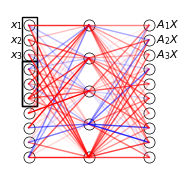

In [8]:
# Load TMS model
high_rank_circuit_path = '/root/eigenestimation/outputs/toy_models/high_rank.pt'
# Load TMS model
circuit_superposition_path = '/root/eigenestimation/outputs/toy_models/circuit_superposition.pt'

model = torch.load(circuit_superposition_path)['model']

model_params = dict(model.named_parameters())
weights = {k:v for k,v in model_params.items() if 'b' not in k}
weights = {str(i):v.transpose(0,1) for i,v in enumerate(weights.values())}

biases = {k:v for k,v in model_params.items() if 'b' in k}
biases = {str(i+1):v for i,v in enumerate(biases.values())}

f, ax = plt.subplots(figsize=(1.8, 2))
a = DrawNeuralNetwork(weights, biases, ax=ax)
ax.text(.69,.88, s='$x_1$', fontsize=8)
ax.text(.69,.79, s='$x_2$', fontsize=8)
ax.text(.69,.7, s='$x_3$', fontsize=8)
ax.text(3.12,.88, s='$A_{1} X$', fontsize=8)
ax.text(3.12,.79, s='$A_{2} X$', fontsize=8)
ax.text(3.12,.7, s='$A_{3} X$', fontsize=8)


# Add a box 
ax.add_patch(plt.Rectangle((.89, .68), 0.25, 0.27, fill=False, color='black', linewidth=1))

ax.add_patch(plt.Rectangle((.89, .68-.27), 0.25, 0.27, fill=False, color='black', linewidth=1))

ax.add_patch(plt.Rectangle((.89, .68-.27), 0.25, 0.27, fill=False, color='black', linewidth=1))

f.savefig(figure_names.toy_models_setup % 'c', bbox_inches='tight', transparent=True)
f.savefig(figure_names.toy_models_setup.replace('.pdf', '.svg') % 'c', bbox_inches='tight', transparent=True)

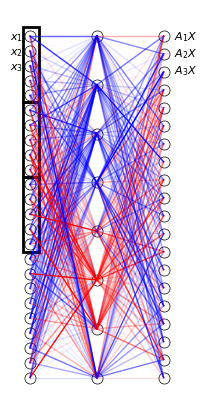

In [9]:
# Load TMS model
high_rank_circuit_path = '/root/eigenestimation/outputs/toy_models/high_rank.pt'

model = torch.load(high_rank_circuit_path)['model']

model_params = dict(model.named_parameters())
weights = {k:.1*v for k,v in model_params.items() if 'b' not in k}
weights = {str(i):v.transpose(0,1) for i,v in enumerate(weights.values())}

biases = {k:v for k,v in model_params.items() if 'b' in k}
biases = {str(i+1):v for i,v in enumerate(biases.values())}

f, ax = plt.subplots(figsize=(2, 5))
a = DrawNeuralNetwork(weights, biases, ax=ax)
ax.text(.7,.89, s='$x_1$', fontsize=8)
ax.text(.7,.855, s='$x_2$', fontsize=8)
ax.text(.7,.82, s='$x_3$', fontsize=8)
ax.text(3.15,.89, s='$A_{1} X$', fontsize=8)
ax.text(3.15,.85, s='$A_{2} X$', fontsize=8)
ax.text(3.15,.81, s='$A_{3} X$', fontsize=8)

# Add a box 
ax.add_patch(plt.Rectangle((.89, .745), 0.25, 0.175, fill=False, color='black', linewidth=2))

ax.add_patch(plt.Rectangle((.89, .745-0.175), 0.25, 0.175, fill=False, color='black', linewidth=2))

ax.add_patch(plt.Rectangle((.89, .745-2*0.175), 0.25, 0.175, fill=False, color='black', linewidth=2))

f.savefig(figure_names.high_rank_circuit_setup, bbox_inches='tight', transparent=True)
f.savefig(figure_names.high_rank_circuit_setup.replace('.pdf', '.svg'), bbox_inches='tight', transparent=True)

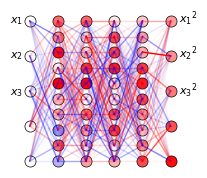

In [11]:
# Load TMS model
squared_path = '/root/eigenestimation/outputs/toy_models/squared.pt'

model = torch.load(squared_path)['model']

model_params = dict(model.named_parameters())
weights = {k:v for k,v in model_params.items() if 'bias' not in k}
weights = {str(i):v for i,v in enumerate(weights.values())}

biases = {k:v for k,v in model_params.items() if 'bias' in k}
biases = {str(i):v for i,v in enumerate(biases.values())}


f, ax = plt.subplots(figsize=(2, 2))
a = DrawNeuralNetwork(weights, biases, ax=ax)
ax.text(.3,.89, s='$x_1$', fontsize=8)
ax.text(.3,.69, s='$x_2$', fontsize=8)
ax.text(.3,.48, s='$x_3$', fontsize=8)
ax.text(6.3,.89, s='${x_1}^2$', fontsize=8)
ax.text(6.3,.69, s='${x_2}^2$', fontsize=8)
ax.text(6.3,.48, s='${x_3}^2$', fontsize=8)

f.savefig(figure_names.toy_models_setup % 'd', bbox_inches='tight', transparent=True)
f.savefig(figure_names.toy_models_setup.replace('.pdf', '.svg') % 'd', bbox_inches='tight', transparent=True)